# Phenomenological model constraining

In [12]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [14]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[2])


/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.dat


In [15]:
%matplotlib inline
from jetset.cosmo_tools import Cosmo
c=Cosmo()
sed_data=ObsData(data_table=data,cosmo=c)
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.2,[10.**6,10.**29])



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



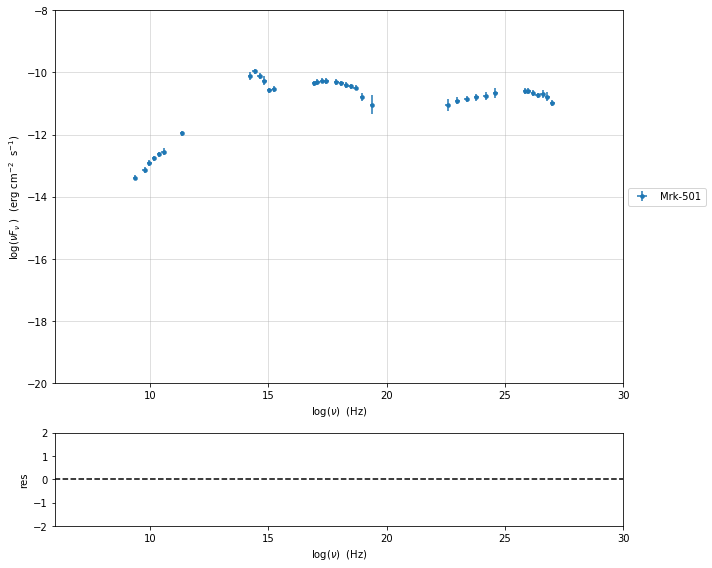

In [16]:
p=sed_data.plot_sed()


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.263144e+00, err=1.386474e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.471527e+00, err=4.951502e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.289841e+00, err=4.834251e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.300000,14.700000]
---> name = IR_Opt           range=[12.300,14.700] log(Hz)  photon.val=-2.025504e+00, err=4.858774e-01 

---> initial range for i

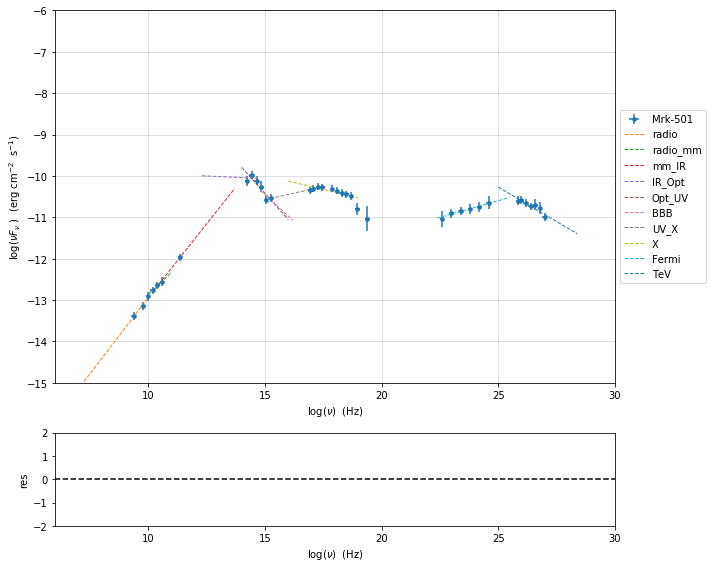

In [17]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices()
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

In [18]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='minuit',
                  silent=True,
                  fit_range=[10,21])


#mm.minimizer.minos_errors()
#p=my_shape.plot_sahpe_fit()
#x,y,z,fig,ax=mm.minimizer.draw_contour('Ep','b')
#x,y,fig,ax=mm.minimizer.draw_profile('Ep')


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
name   par type       units      val  phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- ----- ---------------- ---------------- ----- ------
   b    curvature                -1.0            -10.0              0.0 False  False
   c third-degree                -1.0            -10.0             10.0 False  False
  Ep    peak freq            Hz  14.0              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s) -10.0            -30.0              0.0  True  False
---> class:  HSP

    name       par type       units             val          phys. bound. min phys. bound. max  log  frozen
------------ ------------ ------------- -------------------- ---------------- ---------------- ----- ------
           b    curvature               -0.05476184818547658            -10.0              0.0 False  False
           c third-degree               

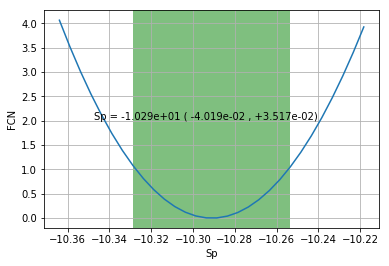

In [19]:
x, y, fig,a=mm.minimizer.draw_mnprofile('Sp')


*** Log-Polynomial fitting of the IC component ***
---> fit range: [21, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
name   par type       units             val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- -------------------- ---------------- ---------------- ----- ------
   b    curvature               -0.12389606172072298            -10.0              0.0 False  False
   c third-degree               -0.02636432545104661            -10.0             10.0 False  False
  Ep    peak freq            Hz   25.451727936395503              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)  -10.570606066366224            -30.0              0.0  True  False

converged=True
calls=231
mesg=
dof=9
chisq=1.256449, chisq/red=0.139605 null hypothesis sig=0.998583

best fit pars
name     bestfit val             err +        err -     

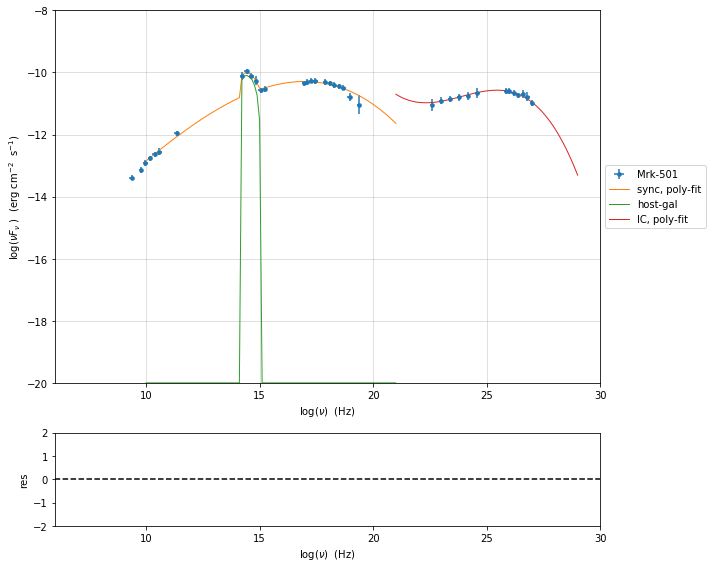

In [20]:
my_shape.IC_fit(fit_range=[21,29],minimizer='minuit')
p=my_shape.plot_shape_fit()



***  constrains parameters from observable ***
      name             par type           units             val         phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ---------------- ----- ------
               N    electron_density         1 / cm3              100.0              0.0             None False  False
            gmin  low-energy-cut-off lorentz-factor* 0.3010299956639812              0.0              9.0  True  False
            gmax high-energy-cut-off lorentz-factor*                6.0              0.0             15.0  True  False
               s   LE_spectral_slope                                2.0            -10.0             10.0 False  False
               r  spectral_curvature                                0.4            -15.0             15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*                4.0              0.0              9.0  True  False


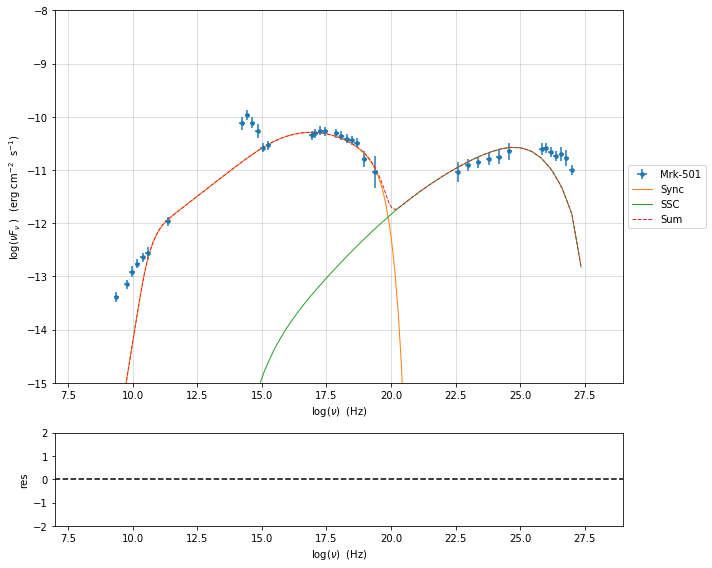

In [33]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=15,
                        B_range=[0.01,0.1],
                        distr_e='lppl',
                        t_var_sec=1*86400,
                        nu_cut_IR=5E10,
                        SEDShape=my_shape)


jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=True)
pl=jet.plot_model(sed_data=sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)